In [1]:
import os
import json
import pandas as pd

# List of JSON files to combine
player_json_files = ['player_tags_0_20240122225832.json','player_tags_1_20240122230532.json','player_tags_2_20240122231219.json',
                         'player_tags_3_20240122231923.json','player_tags_4_20240122232614.json','player_tags_5_20240122233636.json',
                         'player_tags_6_20240122234333.json','player_tags_7_20240122235019.json','player_tags_8_20240122235710.json',
                         'player_tags_9_20240123000445.json','player_tags_0_20240123012026.json','player_tags_1_20240123022952.json', 
                         'player_tags_2_20240123033903.json','player_tags_3_20240123044754.json','player_tags_4_20240123055752.json', 
                         'player_tags_0_20240123113446.json', 'player_tags_0_20240125193606.json','player_tags_1_20240125194914.json', 
                         'player_tags_2_20240125200232.json', 'player_tags_3_20240125201535.json', 'player_tags_4_20240125202858.json']

player_json_files_paths = [os.path.join('Resources', file_name) for file_name in player_json_files]

# List to store combined data
combined_player_tags = []

# Loop through each file and add content to a list
for json_file in player_json_files_paths:
    with open(json_file, 'r') as file:
        data = json.load(file)
        combined_player_tags.extend(data)

# Save as new file        
with open('combined_player_tags.json', 'w') as combined_file:
    json.dump(combined_player_tags, combined_file, indent=2)    

In [2]:
import pandas as pd
# Create dataframe and name columns
player_data_df = pd.DataFrame(columns=["Player Tag", "ID", "Level", "Arena", "Total Exp Points", "Trophies", "Max Trophies", 
                                       "Donations", "Donations Received", "Total Donations", "Donation Ratio", "Role", "Clan Cards Collected", 
                                       "Total Games", "Wins", "Win Rate", "Losses", "Loss Rate"])
player_data_df

,Player Tag,ID,Level,Arena,Total Exp Points,Trophies,Max Trophies,Donations,Donations Received,Total Donations,Donation Ratio,Role,Clan Cards Collected,Total Games,Wins,Win Rate,Losses,Loss Rate


In [ ]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load file
json_file_path = os.path.join('Resources', 'combined_player_tags.json')

try:
    with open(json_file_path, 'r') as file:
        player_data_list = json.load(file)

    # Create lists to store values
    player_tag_list = []
    name_list = []
    level_list = []
    arena_list = []
    exp_list = []
    trophies_list = []
    max_trophies_list = []
    donations_list = []
    donations_received_list = []
    total_donations_list = []
    role_list = []
    clan_cards_list = []
    total_games_list = []
    wins_list = []
    winrate_list = []
    losses_list = []
    lossrate_list = []
    
    # Iterate through each dictionary in the list and get selected data
    for player_entry in player_data_list:
        player_tags = player_entry.get("data", {}).get("tag")
        names = player_entry.get("data", {}).get("name")
        levels = player_entry.get("data", {}).get("expLevel")
        arenas = player_entry.get("data", {}).get("arena", {}).get("name")
        exp = player_entry.get("data", {}).get("totalExpPoints")
        trophies = player_entry.get("data", {}).get("trophies")
        max_trophies = player_entry.get("data", {}).get("bestTrophies")
        donations = player_entry.get("data", {}).get("donations")
        donations_received = player_entry.get("data", {}).get("donationsReceived")
        total_donations = player_entry.get("data", {}).get("totalDonations")
        roles = player_entry.get("data", {}).get("role")
        clan_cards = player_entry.get("data", {}).get("clanCardsCollected")
        total_games = player_entry.get("data", {}).get("battleCount")
        wins = player_entry.get("data", {}).get("wins")
        losses = player_entry.get("data", {}).get("losses")
                
        # Append selected data to the lists
        player_tag_list.append(player_tags)
        name_list.append(names)
        level_list.append(levels)
        arena_list.append(arenas)
        exp_list.append(exp)
        trophies_list.append(trophies)
        max_trophies_list.append(max_trophies)
        donations_list.append(donations)
        donations_received_list.append(donations_received)
        total_donations_list.append(total_donations)
        role_list.append(roles)
        clan_cards_list.append(clan_cards)
        total_games_list.append(total_games)
        wins_list.append(wins)
        losses_list.append(losses)  

    print("Extracted Player Tags:", player_tag_list)
    print("Extracted Names:", name_list)
    print("Extracted Levels:", level_list)
    print("Extracted Arenas:", arena_list)
    print("Extracted Total Exp Points:", exp_list)
    print("Extracted Trophies:", trophies_list)
    print("Extracted Max Trophies:", max_trophies_list)
    print("Extracted Donations:", donations_list)
    print("Extracted Donations Received:", donations_received_list)
    print("Extracted Total Donations:", total_donations_list)
    print("Extracted Roles:", role_list)
    print("Extracted Clan Cards:", clan_cards_list)
    print("Extracted Total Games:", total_games_list)
    print("Extracted Wins:", wins_list)
    print("Extracted Losses:", losses_list)

except json.JSONDecodeError as e:
    print(f"Error loading JSON file: {e}")
except FileNotFoundError:
    print(f"File not found: {json_file_path}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

In [5]:
# Add data from lists to respective columns
player_data_df["Player Tag"] = player_tag_list
player_data_df["ID"] = name_list
player_data_df["Level"] = level_list
player_data_df["Arena"] = arena_list
player_data_df["Total Exp Points"] = exp_list
player_data_df["Trophies"] = trophies_list
player_data_df["Max Trophies"] = max_trophies_list
player_data_df["Donations"] = donations_list
player_data_df["Donations Received"] = donations_received_list
player_data_df["Total Donations"] = total_donations_list
player_data_df["Role"] = role_list
player_data_df["Clan Cards Collected"] = clan_cards_list
player_data_df["Total Games"] = total_games_list
player_data_df["Wins"] = wins_list
player_data_df["Losses"] = losses_list
player_data_df

,Player Tag,ID,Level,Arena,Total Exp Points,Trophies,Max Trophies,Donations,Donations Received,Total Donations,Donation Ratio,Role,Clan Cards Collected,Total Games,Wins,Win Rate,Losses,Loss Rate
0,#LV0LV,FAJRI JR,5,Arena 3,709,676,857,0,0,200,NaN,leader,0,173,73,NaN,97,NaN
1,#8R80YP,<c7>omeganike</,37,Arena 15,117657,5492,5671,0,0,32202,NaN,None,3125,7821,3382,NaN,3359,NaN
2,#R0VJQ,jonas123,10,Arena 6,0,1954,2235,0,0,9192,NaN,member,0,886,405,NaN,437,NaN
3,#JRRULRR9C,samuel,4,Arena 2,0,377,423,0,0,12,NaN,None,0,56,25,NaN,30,NaN
4,#QRJVULQQ9,ash,8,Arena 12,0,3775,3848,0,0,96,NaN,None,0,309,155,NaN,153,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,#U8QYJ92L9,lin,2,Arena 1,58,150,150,0,0,0,NaN,None,0,5,5,NaN,0,NaN
9386,#90CCQLL,Bodzio,9,Arena 9,14174,2857,2982,0,0,2478,NaN,None,0,1223,444,NaN,348,NaN
9387,#GYY8V,Kingaj282,25,Arena 12,17843,3800,4076,0,0,2100,NaN,leader,3465,2173,930,NaN,971,NaN
9388,#P8CL9JVUQ,mv,3,Arena 1,0,278,278,0,0,0,NaN,None,0,29,12,NaN,16,NaN


In [6]:
# Delete duplicates 
unique_player_data_df = player_data_df.drop_duplicates()
unique_player_data_df

,Player Tag,ID,Level,Arena,Total Exp Points,Trophies,Max Trophies,Donations,Donations Received,Total Donations,Donation Ratio,Role,Clan Cards Collected,Total Games,Wins,Win Rate,Losses,Loss Rate
0,#LV0LV,FAJRI JR,5,Arena 3,709,676,857,0,0,200,NaN,leader,0,173,73,NaN,97,NaN
1,#8R80YP,<c7>omeganike</,37,Arena 15,117657,5492,5671,0,0,32202,NaN,None,3125,7821,3382,NaN,3359,NaN
2,#R0VJQ,jonas123,10,Arena 6,0,1954,2235,0,0,9192,NaN,member,0,886,405,NaN,437,NaN
3,#JRRULRR9C,samuel,4,Arena 2,0,377,423,0,0,12,NaN,None,0,56,25,NaN,30,NaN
4,#QRJVULQQ9,ash,8,Arena 12,0,3775,3848,0,0,96,NaN,None,0,309,155,NaN,153,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,#U8QYJ92L9,lin,2,Arena 1,58,150,150,0,0,0,NaN,None,0,5,5,NaN,0,NaN
9386,#90CCQLL,Bodzio,9,Arena 9,14174,2857,2982,0,0,2478,NaN,None,0,1223,444,NaN,348,NaN
9387,#GYY8V,Kingaj282,25,Arena 12,17843,3800,4076,0,0,2100,NaN,leader,3465,2173,930,NaN,971,NaN
9388,#P8CL9JVUQ,mv,3,Arena 1,0,278,278,0,0,0,NaN,None,0,29,12,NaN,16,NaN


In [7]:
# Calculate win rate and loss rate
win_rates_list = []
loss_rates_list = []
donation_ratio_list = []

for index, row in unique_player_data_df.iterrows():
    wins = row["Wins"]
    losses = row["Losses"]
    total_games = row["Total Games"]
    total_donations = row["Total Donations"]
    
    if total_games is None or total_games == 0:
        win_rate = 0
        loss_rate = 0
        draw_rate = 0
    else:
        win_rate = wins / total_games 
        loss_rate = losses / total_games 
    
    rounded_win_rate = round(win_rate, 2)
    rounded_loss_rate = round(loss_rate, 2)
    
    win_rates_list.append(rounded_win_rate)
    loss_rates_list.append(rounded_loss_rate)
    
    # Calculate donation ratio
    if total_games is None or total_games == 0:
        donation_ratio = 0
    else:
        donation_ratio = total_donations / total_games
    
    donation_ratio_list.append(donation_ratio)
    
# Assign the calculated win rates to new columns
unique_player_data_df["Win Rate"] = win_rates_list
unique_player_data_df["Loss Rate"] = loss_rates_list
unique_player_data_df["Donation Ratio"] = donation_ratio_list
unique_player_data_df

C:\Users\sungm\AppData\Local\Temp\ipykernel_95592\2656427487.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_player_data_df["Win Rate"] = win_rates_list
C:\Users\sungm\AppData\Local\Temp\ipykernel_95592\2656427487.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_player_data_df["Loss Rate"] = loss_rates_list
C:\Users\sungm\AppData\Local\Temp\ipykernel_95592\2656427487.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

,Player Tag,ID,Level,Arena,Total Exp Points,Trophies,Max Trophies,Donations,Donations Received,Total Donations,Donation Ratio,Role,Clan Cards Collected,Total Games,Wins,Win Rate,Losses,Loss Rate
0,#LV0LV,FAJRI JR,5,Arena 3,709,676,857,0,0,200,1.156069,leader,0,173,73,0.42,97,0.56
1,#8R80YP,<c7>omeganike</,37,Arena 15,117657,5492,5671,0,0,32202,4.117376,None,3125,7821,3382,0.43,3359,0.43
2,#R0VJQ,jonas123,10,Arena 6,0,1954,2235,0,0,9192,10.374718,member,0,886,405,0.46,437,0.49
3,#JRRULRR9C,samuel,4,Arena 2,0,377,423,0,0,12,0.214286,None,0,56,25,0.45,30,0.54
4,#QRJVULQQ9,ash,8,Arena 12,0,3775,3848,0,0,96,0.310680,None,0,309,155,0.50,153,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9385,#U8QYJ92L9,lin,2,Arena 1,58,150,150,0,0,0,0.000000,None,0,5,5,1.00,0,0.00
9386,#90CCQLL,Bodzio,9,Arena 9,14174,2857,2982,0,0,2478,2.026165,None,0,1223,444,0.36,348,0.28
9387,#GYY8V,Kingaj282,25,Arena 12,17843,3800,4076,0,0,2100,0.966406,leader,3465,2173,930,0.43,971,0.45
9388,#P8CL9JVUQ,mv,3,Arena 1,0,278,278,0,0,0,0.000000,None,0,29,12,0.41,16,0.55


In [16]:
# Export to csv
unique_player_data_df.to_csv('unique_player_data.csv', index=False)

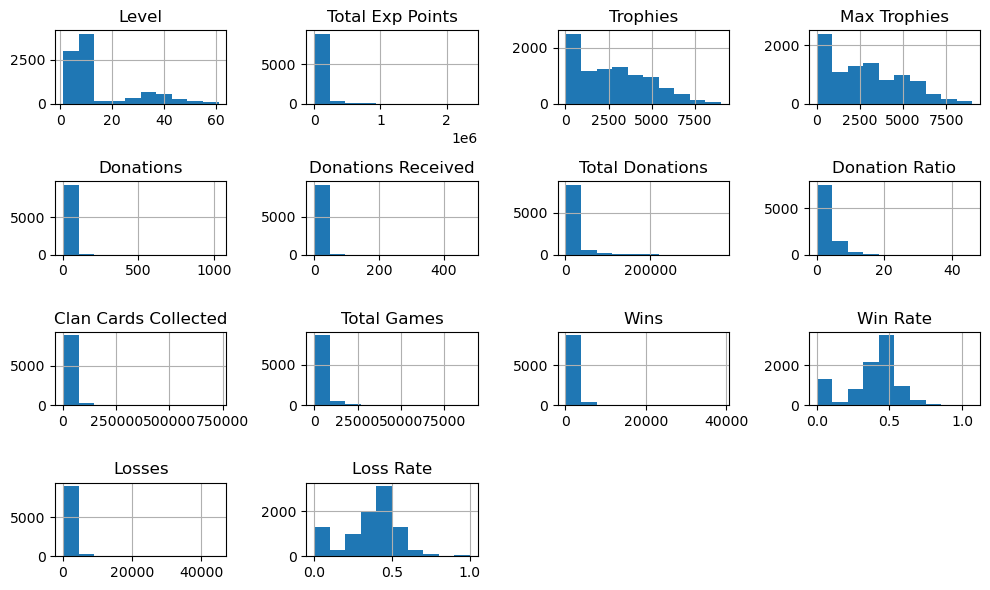

In [8]:
unique_player_data_df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

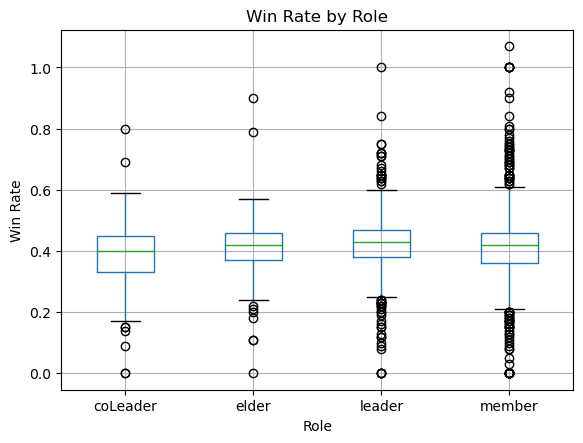

In [9]:
# Win rate by role
plt.figure(figsize=(8, 6))
unique_player_data_df.boxplot(by='Role', column='Win Rate')
plt.title('Win Rate by Role')
plt.xlabel('Role')
plt.ylabel('Win Rate')
plt.suptitle('')
plt.show()

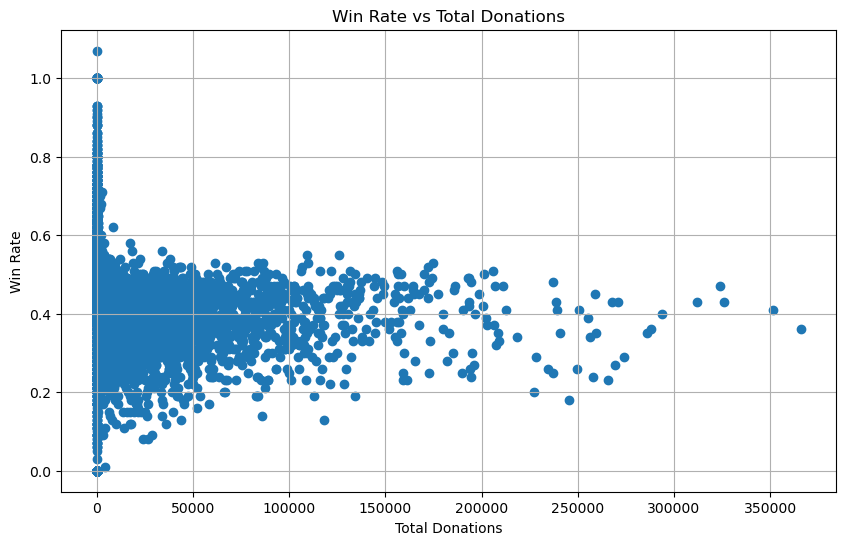

In [10]:
# Win rate by total donations 
plt.figure(figsize=(10, 6))
plt.scatter(unique_player_data_df["Total Donations"], unique_player_data_df["Win Rate"])
plt.xlabel('Total Donations')
plt.ylabel('Win Rate')
plt.title('Win Rate vs Total Donations')
plt.grid(True)
plt.show()

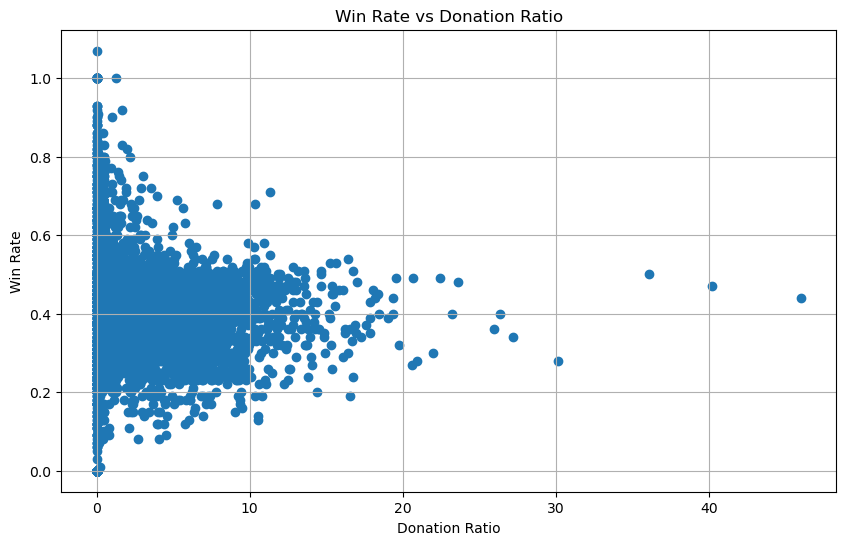

In [11]:
# Win rate by donation ratio
plt.figure(figsize=(10, 6))
plt.scatter(unique_player_data_df["Donation Ratio"], unique_player_data_df["Win Rate"])
plt.xlabel('Donation Ratio')
plt.ylabel('Win Rate')
plt.title('Win Rate vs Donation Ratio')
plt.grid(True)
plt.show()

In [15]:
numerical_columns = ["Level", "Total Exp Points", "Trophies", "Total Donations", "Donation Ratio", 
                     "Wins", "Losses", "Win Rate", "Loss Rate"]

# Calculate the correlation matrix
correlation_matrix = unique_player_data_df[numerical_columns].corr()
correlation_matrix

,Level,Total Exp Points,Trophies,Total Donations,Donation Ratio,Wins,Losses,Win Rate,Loss Rate
Level,1.000000,0.704263,0.869711,0.695482,0.583980,0.707365,0.664211,0.156698,0.075089
Total Exp Points,0.704263,1.000000,0.589321,0.797711,0.367820,0.793504,0.731901,0.023141,-0.028291
Trophies,0.869711,0.589321,1.000000,0.619736,0.608423,0.667440,0.630084,0.298123,0.178076
Total Donations,0.695482,0.797711,0.619736,1.000000,0.609591,0.818519,0.755784,0.012411,-0.049337
Donation Ratio,0.583980,0.367820,0.608423,0.609591,1.000000,0.387621,0.346776,0.083902,-0.021998
Wins,0.707365,0.793504,0.667440,0.818519,0.387621,1.000000,0.971533,0.073883,0.031910
Losses,0.664211,0.731901,0.630084,0.755784,0.346776,0.971533,1.000000,0.064429,0.059939
Win Rate,0.156698,0.023141,0.298123,0.012411,0.083902,0.073883,0.064429,1.000000,0.515329
Loss Rate,0.075089,-0.028291,0.178076,-0.049337,-0.021998,0.031910,0.059939,0.515329,1.000000
